In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Tensorflow Version 2.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn>=0.24
!pip install ktrain # for BERT model

     |████████████████████████████████| 25.3MB 122kB/s 
     |████████████████████████████████| 6.8MB 38.6MB/s 
     |████████████████████████████████| 983kB 31.0MB/s 
     |████████████████████████████████| 266kB 33.1MB/s 
     |████████████████████████████████| 1.9MB 34.7MB/s 
     |████████████████████████████████| 1.2MB 35.7MB/s 
     |████████████████████████████████| 471kB 24.8MB/s 
     |████████████████████████████████| 3.3MB 36.5MB/s 
     |████████████████████████████████| 901kB 38.1MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=f6aa406c46d0ef233d2eb568ca1aba1244f88cad2404783f2d37c23168839965
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=8033533c4c6f4e739a99ed56a446fca69b8844fd8272e1061070bff8bcda608e
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data/Big Data Project/Constraint_English_Train - Sheet1.csv')

In [ ]:
df = df.drop(['id'], axis=1)
df.columns = ['tweet', 'label']
df.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


Text(0.5, 1.0, 'Tweet Data Distribution')

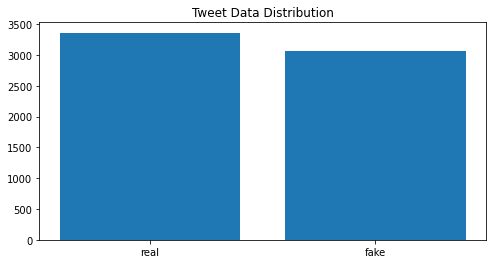

In [ ]:
val_count = df.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Tweet Data Distribution")

In [ ]:
import random
random_idx_list = [random.randint(1,len(df.tweet)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,tweet,label
5967,A photo shows coronavirus victims lying in the...,fake
1222,American's arm themselves as Coronavirus panic...,fake
1275,_China has successfully developed a vaccine re...,fake
2637,There are no recovered cases to report today m...,real
2736,#IndiaFightsCorona: With Indian Startups comin...,real
3099,RT @PIB_India: This is the first time after th...,real
4666,🚨 A game changer for COVID testing Abbott Labs...,real
2487,Groups of pupils should only be sent home if t...,real
3468,“The data says we must act now.” Health secret...,real
1870,RT @DepSecHargan: COVID-19 resources for child...,real


In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.tweet = df.tweet.apply(lambda x: preprocess(x))

In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 5136
Test Data size 1284


In [ ]:
train_data.head(10)

,tweet,label
2431,barack obama urged africans reject covid 19 va...,fake
1109,actors applauded macron visited suburban city ...,fake
5492,national taskforce covid19 constituted icmrdel...,real
2646,patients critically ill severe covid19 higher ...,real
2388,update minhealthnz today one new case covid 19...,real
2896,although testing capacity improving michigan p...,real
2817,indiafightscorona new recoveries india exceede...,real
2536,coronavirusupdates covid19 testing status upda...,real
444,factcheck repeatedly said vaccine covid2019 ye...,fake
640,despite ease lockdown starting 4th may critica...,real


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.tweet)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 12310


In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.tweet),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.tweet),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (5136, 30)
Testing X Shape: (1284, 30)


In [ ]:
labels = train_data.label.unique().tolist()

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.label.to_list())

y_train = encoder.transform(train_data.label.to_list())
y_test = encoder.transform(test_data.label.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (5136, 1)
y_test shape: (1284, 1)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-04-23 14:31:59--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-23 14:31:59--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-23 14:31:59--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 15
MODEL_PATH = '/content/drive/MyDrive/Classroom/best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/15
6/6 [==============================] - 38s 567ms/step - loss: 0.6576 - accuracy: 0.6108 - val_loss: 0.5247 - val_accuracy: 0.7368
Epoch 2/15
6/6 [==============================] - 2s 380ms/step - loss: 0.5092 - accuracy: 0.7511 - val_loss: 0.4062 - val_accuracy: 0.8193
Epoch 3/15
6/6 [==============================] - 2s 368ms/step - loss: 0.4109 - accuracy: 0.8156 - val_loss: 0.3434 - val_accuracy: 0.8536
Epoch 4/15
6/6 [==============================] - 2s 373ms/step - loss: 0.3589 - accuracy: 0.8435 - val_loss: 0.3161 - val_accuracy: 0.8723
Epoch 5/15
6/6 [==============================] - 2s 391ms/step - loss: 0.3470 - accuracy: 0.8528 - val_loss: 0.2971 - val_accuracy: 0.8801
Epoch 6/15
6/6 [==============================] - 2s 404ms/step - loss: 0.3241 - accuracy: 0.8595 - val_loss: 0.2766 - val_accuracy: 0.8832
Epoch 7/15
6/6 [==============================] - 2s 411ms/step - loss: 0.3023 - accuracy: 0.8743 - val_loss: 0.2904 - val_accuracy: 0.8754
Epoch 8/15
6/6 [===

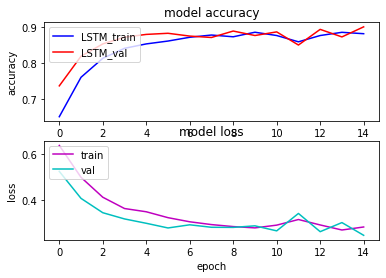

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "real" if score>0.5 else "fake"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 [==============================] - 1s 832ms/step


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

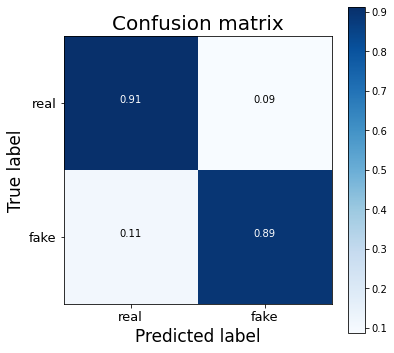

In [ ]:
cnf_matrix = confusion_matrix(test_data.label.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.label.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(list(test_data.label), y_pred_1d))

              precision    recall  f1-score   support

        fake       0.88      0.91      0.90       607
        real       0.92      0.89      0.90       677

    accuracy                           0.90      1284
   macro avg       0.90      0.90      0.90      1284
weighted avg       0.90      0.90      0.90      1284

